# Predicción de la supervivencia de pasajeros del desastre del Titanic con aprendizaje automático

Este ejercicio tiene como objetivo predecir el resultado del desastre del Titanic utilizando aprendizaje automático. Los datos proporcionados están divididos en datos de entrenamiento y prueba. El archivo train.csv se utilizará para ajustar los algoritmos de aprendizaje automático que luego se aplicarán al archivo test.csv para predecir quién sobrevivirá. Los conjuntos de datos consisten en diferentes características que se enumeran a continuación:

| Variable | Definición | Clave |
| :- | -: | :-: |
| PClass | Clase de Pasajero | 1=1ra, 2=2da, 3=3ra |
| Sex | Género | |
| Age | Edad en años |
| SibSp | # de hermanos/as / cónyuges a bordo del Titanic  |
| Parch | # de padres / hijos a bordo del Titanic |
| Ticket | Número de boleto |
| Fare | Tarifa del pasajero |
| Cabin | Número de cabina |
| Embarked | Puerto de embarque | C = Cherburgo, Q = Queenstown, S = Southampton |
| Survived | Supervivencia | 0=No, 1=Sí |

Notas sobre las variables

pclass:
1ra = Superior,
2da = Media,
3ra = Inferior

age: La edad es fraccionaria si es menor a 1. Si la edad es estimada, tendrá la forma xx.5

sibsp: <br> El conjunto de datos define las relaciones familiares de esta manera: <br>
Hermano/a = hermano, hermana, hermanastro, hermanastra <br>
Cónyuge = esposo, esposa (amantes y prometidos/as fueron ignorados)

parch: <br> El conjunto de datos define las relaciones familiares de esta manera: <br>
Padre/Madre = madre, padre <br> Hijo/a = hija, hijo, hijastra, hijastro <br> Algunos niños viajaron solo con una niñera, por lo tanto parch=0 para ellos.

Este ejercicio se divide en tres partes, siendo el procesamiento de datos la más larga e importante.
1. Visualización de datos
2. Procesamiento de datos
3. Algoritmos de aprendizaje automático

## Importar bibliotecas

En esta primera parte hay que importar todas las librerías que se usarán. Seaborn y matplotlib se usan para la visualización de datos. Pandas y numpy ayudarán con el procesamiento de datos y álgebra lineal. Finalmente, se importan las bases de datos para los diferentes algoritmos de aprendizaje automático desde sklearn. Opcionalmente, se agrega una base de datos de imágenes con el propósito de añadir imágenes al cuaderno de Jupyter.

In [385]:
# data visualization
import seaborn as sns # type: ignore
%matplotlib inline
from matplotlib import pyplot as plt # type: ignore
from matplotlib import style

# data processing
import pandas as pd

# linear algebra
import numpy as np

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

import time

from sklearn import tree

#Show images
from PIL import Image

# 1. Visualización de datos

La primera parte de visualización de datos está para obtener un entendimiento del conjunto de datos. Solo conociendo con qué estamos trabajando, podemos determinar qué datos necesitamos o no.

Con todas las librerías importadas, podemos comenzar creando nuevas variables "test_df" que contendrá nuestro conjunto de prueba y "train_df" que incluye el conjunto de entrenamiento. Para hacer esto, usamos la función "read_csv" de pandas.

In [327]:
#Loading the datasets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [328]:
# info returns the number of non-null values in each column and the data type of each column
# it also returns the number of rows in the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


La función .info() en Python muestra información sobre el conjunto de datos. Muestra todas las columnas, el recuento de entradas dentro de las columnas y qué tipo tienen. En este caso, tenemos dos float64, cinco int64 y cinco objetos.

In [329]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [330]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Al echar un vistazo rápido al conjunto de entrenamiento, se pueden notar algunos problemas. Hay entradas __faltantes__ (NaN = not a number) que deben ser tratadas. Además, muchas entradas __no son numéricas__, lo que significa que deben ser convertidas __en valores numéricos__ para los algoritmos de aprendizaje automático.

Veamos más de cerca qué es lo que realmente falta.

In [331]:
#Check for NaN or empty entries in trainingsdata
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Con solo dos valores faltantes, la característica Embarked puede completarse fácilmente. La característica Age no es tan simple de completar y la característica Cabin con 687 valores faltantes probablemente será eliminada por completo.

In [332]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Pregunta: <br>
Mirando nuevamente todas las características proporcionadas, ¿cuáles crees que no tendrán un efecto en los modelos de predicción?

Respuesta: <br>
PassengerId, Ticket, Name <br>

Comencemos por mirar las otras características. (Primero Age y Sex)

## Age y Sex

Para la visualización gráfica de Age y Sex con respecto a la tasa de supervivencia, usaremos un histograma. Un histograma muestra la distribución de una característica específica. En este caso, es la distribución de pasajeros femeninos y masculinos respecto a su edad y cuántos sobrevivieron.

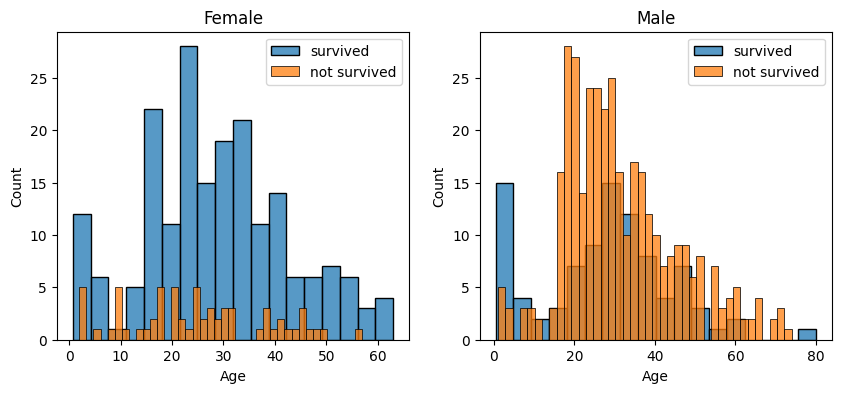

In [333]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Gráfico para mujeres
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

# Gráfico para hombres
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

Al crear el histograma, se aprecia claramente que los hombres entre 20-40 años tuvieron una mayor probabilidad de supervivencia. Para las mujeres, la mayor probabilidad de supervivencia está entre 14 y 40 años. También es notable que los infantes tienen una tasa de supervivencia más alta.

Pregunta: <br>
¿Qué se puede hacer con la edad para simplificarla aún más?

Respuesta: <br>
Ciertas edades tienen mayores probabilidades de supervivencia que otras -> crear grupos para tener una escala similar a otras características.

## Embarked, Pclass y Sex

Para visualizar la característica Embarked, usaremos FacetGrid. Ayuda a mostrar distribuciones o relaciones entre múltiples variables.

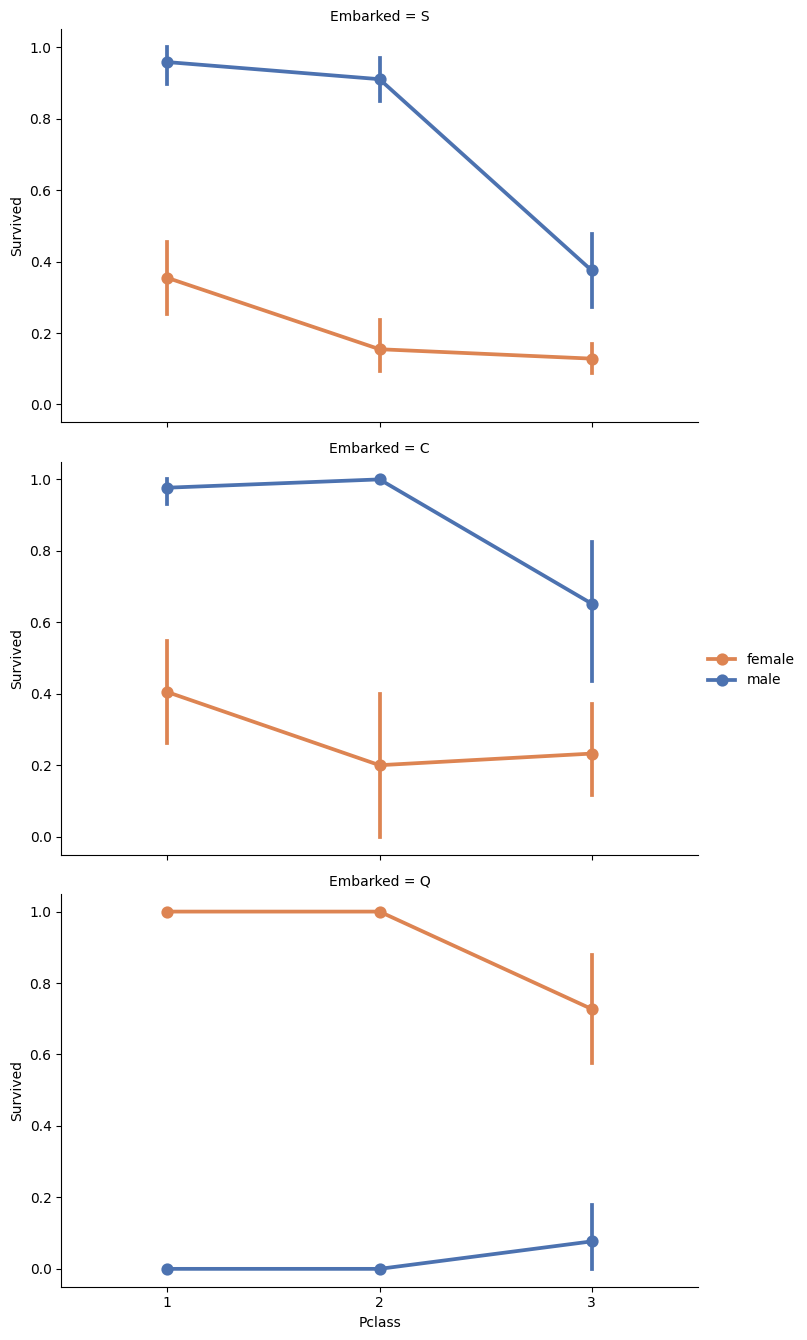

In [334]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=None, hue_order=None)
FacetGrid.add_legend()

La característica Embarked también muestra tener un gran impacto en la probabilidad de supervivencia de los pasajeros. Los hombres que embarcaron en el puerto C tienen una mayor probabilidad de supervivencia que en el puerto S o Q. Las mujeres, por otro lado, tienen una baja tasa de supervivencia en el puerto C y altas probabilidades en los puertos S y Q.
La clase también parece tener un efecto en la tasa de supervivencia.

<Axes: xlabel='Pclass', ylabel='Survived'>

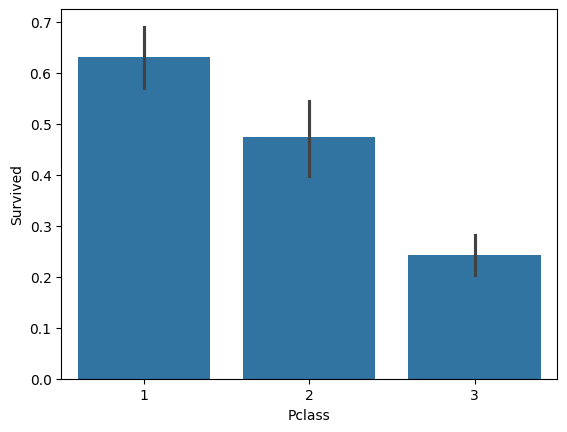

In [335]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Es inmediatamente evidente que la clase 1 tiene la mayoría de los sobrevivientes y la clase 3, la menor cantidad.

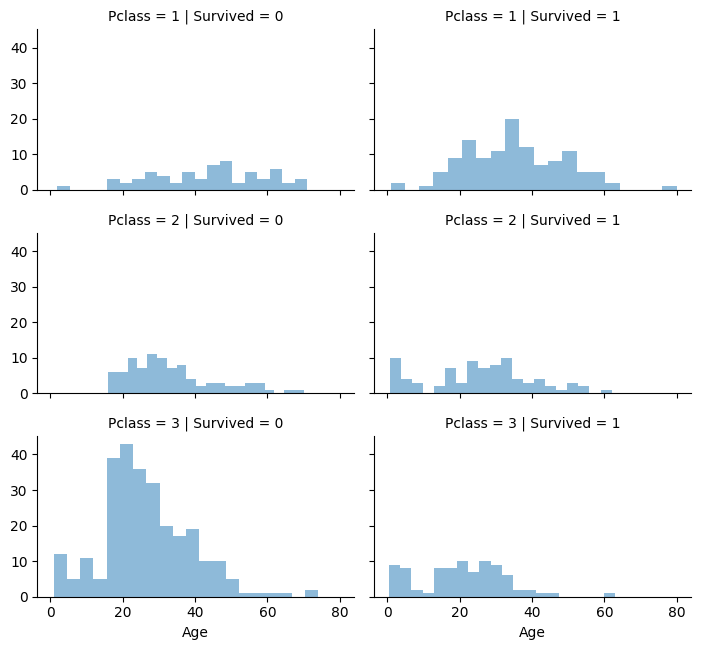

In [336]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Esta gráfica muestra la influencia de Pclass y destaca la alta tasa de mortalidad de los pasajeros en la clase 3.

## SibSp y Parch

SibSp y Parch son características que muestran a pasajeros y cuántos familiares tienen a bordo. En consecuencia, esta característica debería combinarse en una sola. El siguiente código crea una nueva característica "not_alone" que muestra si un pasajero no está solo.

In [337]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

not_alone
0    537
1    354
Name: count, dtype: int64

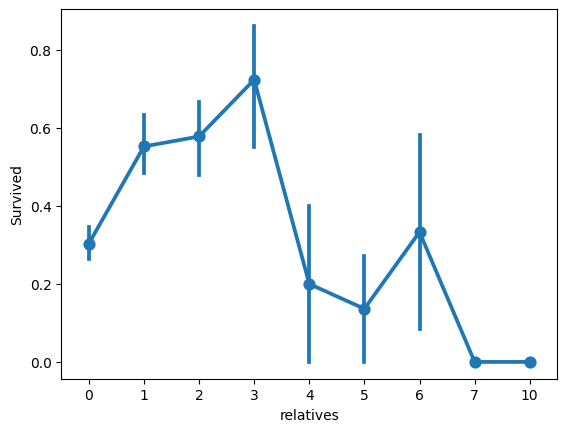

In [338]:
axes = sns.pointplot(x='relatives', y='Survived', data=train_df)

La gráfica muestra la tasa de supervivencia en relación con la cantidad de familiares que tiene una persona. Los pasajeros con 1-3 familiares tienen mayores probabilidades de supervivencia.

__Concluyendo la visualización de datos:__
- Buscamos valores vacíos o faltantes (NaN). Deben tratarse después.
    - Cabin 687
    - Age 177
    - Embarked 2
- Buscamos valores que tienen una influencia en la probabilidad de supervivencia.
    - Age y Sex ambos tienen impacto en la supervivencia.
    - Embarked y Pclass también muestran efecto en la supervivencia.
- SibSp y Parch son características similares y deberían combinarse, y también parecen afectar la probabilidad de supervivencia.

# 2. Preprocesamiento de datos

Después de establecer una comprensión de los datos, podemos comenzar a darles la forma que necesitamos. Para los algoritmos de aprendizaje automático, queremos que todo esté en valores numéricos y que sea similar en escala.

## PassengerId

El PassengerId no tiene influencia en la probabilidad de supervivencia. En este caso, eliminaremos la columna del conjunto de entrenamiento.


In [339]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [340]:
#Check tickets
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [341]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## Manejo de datos faltantes

### Cabin

Mirando de nuevo las características, tenemos 687 valores faltantes en Cabin, 177 valores en Age y solo 2 en Embarked.

Los valores en Cabin están compuestos por una letra y un número, siendo la letra la cubierta. En lugar de eliminar la característica por completo, solo eliminaremos el número y crearemos una nueva característica llamada "deck", resultante de la letra de Cabin. La letra de la cubierta se convertirá en numérica y los valores faltantes serán 0.

In [342]:
#Antigua característica 'Cabin'
print(train_df['Cabin'].head(8))

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
Name: Cabin, dtype: object


In [343]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

(Comparación entre Cabin y Deck)

In [344]:
#Nueva característica 'Deck'
print(dataset['Deck'].head(8))

0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
Name: Deck, dtype: int32


### Age

Para Age, se agregarán nuevos valores derivados de la edad media de la desviación estándar.

In [345]:
# Solución corregida para imputar edades faltantes en Titanic
data = [train_df, test_df]

# Se procesa cada conjunto (train y test) por separado
for dataset in data:
    # Se calcula la media y desviación estándar del MISMO conjunto que se va a modificar
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Se generan valores aleatorios según la distribución del conjunto actual
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    
    # Se crea una copia para evitar SettingWithCopyWarning
    age_slice = dataset["Age"].copy()
    
    # Se reemplaza los valores NaN con los aleatorios generados
    age_slice[np.isnan(age_slice)] = rand_age
    
    # Se asignan de vuelta al dataset y convertimos a entero
    dataset["Age"] = age_slice.astype(int)

# Se verifica que no quedan valores nulos en train_df
print("Valores nulos en Age de train_df:", train_df["Age"].isnull().sum())
print("Valores nulos en Age de test_df:", test_df["Age"].isnull().sum())

Valores nulos en Age de train_df: 0
Valores nulos en Age de test_df: 0


In [346]:
print(train_df['Age'])

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    22
889    26
890    32
Name: Age, Length: 891, dtype: int32


La característica Embarked tiene dos valores faltantes. Estos se completarán con la característica más común. La función .describe() de Python cuenta todos los valores y devuelve la función más importante. Esto aplica solo a valores categóricos. Para valores numéricos, la función .describe() devuelve percentiles y valores medios.

In [347]:
train_df['Embarked'].describe()
# .describe funciona de manera diferente para series numéricas y categóricas. La siguiente vista sólo se logra con datos categóricos. Si más abajo
# los valores se convierten a numéricos, se calcula el promedio, etc.

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Para la característica Embarked, la más común es el puerto S, con 644 entradas.

In [348]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

Después de llenar todos los valores faltantes, podemos verificar nuestro conjunto de datos con .info(). Todas las características deberían contener ahora 891 entradas y cero valores faltantes. <br>También podemos detectar las características recién añadidas "not_alone" y "Deck". La imagen importada muestra el conjunto de datos original sin el procesamiento de datos.

In [349]:
#train_df.info()
#print("")
#img = Image.open('train_df_info.jpg')
#img

Como se mencionó anteriormente, todas las características deberían ser valores numéricos. El siguiente paso muestra la conversión a valores numéricos.

In [350]:
#Converting "fare" from float64 to int 64
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

La parte complicada de los nombres es que hay muchos títulos diferentes, aparte de Mr o Mrs, como "Lady", "Countess" y así sucesivamente. Estos no son numerosos pero aún deben tenerse en cuenta. Los siguientes títulos 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer' y 'Dona' se convertirán en un solo título llamado 'Rare'.

'Mlle' y 'Ms' se convertirán en 'Miss' y 'Mme' será 'Mrs'.

Al final, nos quedan cinco nuevos títulos en total -> "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5

In [351]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Nuevamente usando la función .map(), definimos male como 0 y female como 1. <br>
Lo mismo se hace para convertir los puertos S, C y Q de la característica Embarked.

In [352]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [353]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Después de que todos los valores se han convertido a numéricos, nos queda el siguiente conjunto de datos de entrenamiento.

In [354]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int32
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int32
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int32
 10  Deck       891 non-null    int32
 11  Title      891 non-null    int64
dtypes: int32(4), int64(8)
memory usage: 69.7 KB


## Creación de nuevas categorías

Referencia a 1. visualización de datos "Age and Sex" -> Crear nueva categoría <br>
Pregunta: <br>
¿Qué sería importante al crear nuevas clases? <br>

Respuesta: <br>
Dividirlas en grupos uniformes, para que ningún grupo incluya demasiadas características en comparación con los otros.

In [355]:
test = pd.qcut(train_df['Age'], 8)

In [356]:
test.value_counts()

Age
(16.0, 21.0]      139
(37.0, 45.0]      121
(-0.001, 16.0]    115
(24.0, 28.0]      114
(28.0, 32.0]      105
(32.0, 37.0]      103
(45.0, 80.0]      101
(21.0, 24.0]       93
Name: count, dtype: int64

In [357]:
#Creating Categories
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 37), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 7

# let's see how it's distributed
train_df['Age'].value_counts()

Age
1    139
6    121
0    115
3    114
4    105
5    103
7    101
2     93
Name: count, dtype: int64

Pregunta: <br>
¿Qué característica queda que también podría usar nuevas categorías? <br>

Respuesta: <br>
Fare

In [358]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

Usando la función qcut(), pandas puede crear grupos de rangos que tienen cantidades similares de entradas. <br>
Después de eso, podemos recorrer los datos y asignar el grupo a cada valor.

In [359]:
groups = pd.qcut(train_df['Fare'], 6)

In [360]:
groups.value_counts()

Fare
(-0.001, 7.0]    241
(14.0, 26.0]     165
(8.0, 14.0]      146
(52.0, 512.0]    146
(26.0, 52.0]     123
(7.0, 8.0]        70
Name: count, dtype: int64

In [361]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [362]:
train_df['Fare'].value_counts()

Fare
0    241
3    165
5    146
2    146
4    123
1     70
Name: count, dtype: int64

El último paso antes de aplicar los algoritmos de aprendizaje automático es crear dos nuevas características. <br>
Pregunta: ¿cuáles se podrían combinar? (¿o es demasiado difícil?)

In [363]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [364]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,1,8,1,6,0
1,1,1,1,6,1,0,5,1,1,1,3,3,6,2
2,1,3,1,3,0,0,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,5,0,1,1,3,3,5,2
4,0,3,0,5,0,0,1,0,0,0,8,1,15,1
5,0,3,0,0,0,0,1,2,0,0,8,1,0,1
6,0,1,0,7,0,0,4,0,0,0,5,1,7,4
7,0,3,0,0,3,1,3,0,4,1,8,4,0,0
8,1,3,1,3,0,2,2,0,2,1,8,3,9,0
9,1,2,1,0,1,0,4,1,1,1,8,3,0,2


# 3. Algoritmos de Aprendizaje de Máquinas

First we need to split the data into a training, validation and test set.

The thresholds and ratios I am currently using are just examples.
You can adjust them based on your dataset size, after investigation, it seems like those ratios are commonly used in the field, but they may not be optimal for every dataset.
https://towardsdatascience.com/learnings-from-a-machine-learning-engineer-part-2-the-data-sets/

In [365]:
# Constants
RANDOM_SEED = 42  # The answer to life, the universe, and everything
DATASET_SIZE_THRESHOLDS = {
    "small": 10000,
    "medium": 100000
}

SPLIT_RATIOS = {
    "small": {"train": 0.8, "val": 0.1, "test": 0.1},
    "medium": {"train": 0.7, "val": 0.15, "test": 0.15},
    "large": {"train": 0.6, "val": 0.2, "test": 0.2}
}

In [366]:
def determine_dataset_size(df_length):
    """Determine the dataset size category based on length."""
    if df_length < DATASET_SIZE_THRESHOLDS["small"]:
        return "small"
    elif df_length < DATASET_SIZE_THRESHOLDS["medium"]:
        return "medium"
    else:
        return "large"

Utils used to evaluate the models

In [380]:
def evaluate_model(model, X_test, y_test, feature_names=None, export_conf_matrix=False):
    """Evaluate the model and print detailed metrics."""
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model prediction time: {prediction_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Did Not Survive', 'Survived'],
                yticklabels=['Did Not Survive', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    if export_conf_matrix:
        plt.savefig("confusion_matrix.png")
        plt.close()

    # Visualize decision tree if it's not too complex
    if isinstance(model, DecisionTreeClassifier) and model.tree_.node_count < 50:
        plt.figure(figsize=(20, 10))
        tree.plot_tree(model, feature_names=feature_names, 
                      class_names=['Did Not Survive', 'Survived'],
                      filled=True, rounded=True)
        plt.title('Decision Tree Visualization')
        plt.tight_layout()
        plt.show()

    # Visualize Stochastic Gradient Descent (SGD) if applicable
    if isinstance(model, SGDClassifier) and feature_names is not None:
        plt.figure(figsize=(10, 6))
        feature_importance = pd.Series(model.coef_[0], index=feature_names).sort_values()
        feature_importance.plot(kind='barh', color='teal')
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.title("Feature Importance (SGD Coefficients)")
        plt.tight_layout()
        plt.show()
    
    # Visualize feature importance for Random Forest
    # if isinstance(model, RandomForestClassifier) and feature_names is not None:
    #     feature_importance = pd.DataFrame({
    #         'Feature': feature_names,
    #         'Importance': model.feature_importances_
    #     }).sort_values('Importance', ascending=False)
        
    #     print("\nFeature Importance (Random Forest):")
    #     print(feature_importance)

    #     # Plot feature importance
    #     plt.figure(figsize=(10, 6))
    #     sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    #     plt.xlabel("Feature Importance Score")
    #     plt.ylabel("Feature")
    #     plt.title("Feature Importance (Random Forest)")
    #     plt.tight_layout()
    #     plt.show()

    # # Logistic Regression Feature Importance
    # if isinstance(model, LogisticRegression) and feature_names is not None:
    #     plt.figure(figsize=(10, 6))
    #     feature_importance = pd.Series(model.coef_[0], index=feature_names).sort_values()
    #     feature_importance.plot(kind='barh', color='darkred')
    #     plt.xlabel("Coefficient Value")
    #     plt.ylabel("Feature")
    #     plt.title("Feature Importance (Logistic Regression Coefficients)")
    #     plt.tight_layout()
    #     plt.show()
    
    
    return accuracy, y_pred

In [368]:
def split_dataset(df, dataset_size):
    """Split dataset based on size category."""
    ratios = SPLIT_RATIOS[dataset_size]
    
    # Calculate split indices
    train_end = int(ratios["train"] * len(df))
    val_end = train_end + int(ratios["val"] * len(df))
    
    # Split the dataframe
    train_df = df[:train_end]
    val_df = df[train_end:val_end]
    test_df = df[val_end:]
    
    return train_df, val_df, test_df

In [369]:
# This following code would be used in a context where you want to split the dataset into training, validation, and test sets based on the size of the dataset.
# The dataset is shuffled once at the start to ensure randomness in the splits.
df = train_df.sample(frac=1, random_state=RANDOM_SEED)

# Determine dataset size and apply appropriate split
dataset_size = determine_dataset_size(len(df))
train_df, val_df, test_df = split_dataset(df, dataset_size)

print(f"Dataset size category: {dataset_size}")
print(f"Train size: {len(train_df)} ({len(train_df)/len(df):.1%})")
print(f"Validation size: {len(val_df)} ({len(val_df)/len(df):.1%})")
print(f"Test size: {len(test_df)} ({len(test_df)/len(df):.1%})")

# Prepare features and target variables
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

X_val = val_df.drop("Survived", axis=1)
y_val = val_df["Survived"]

X_test = test_df.drop("Survived", axis=1)
y_test = test_df["Survived"]

# Verify dataset shapes
print("\nDataset Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

"""
# In the given case the test dataset is imcomplete so we will need to use the training set for training and validation and testing.

# in the theorical case the test set would be complete we would use the following code.
test_df = test_df.sample(frac=1, random_state=answer_to_life_the_universe_and_everything)
train_df = train_df.sample(frac=1, random_state=answer_to_life_the_universe_and_everything)

# Now, let's split the  test_df into two equal parts for validation and testing
val_df, test_df = np.split(test_df, [int(.5 * len(test_df))])


## Eliminar la característica "Survived" del conjunto de datos de entrenamiento y usar el conjunto de datos resultante como "Predictor", llámalo X_train.
## Tomar la característica "Survived" del conjunto de datos de entrenamiento como "Respuesta" para tus modelos, llámala Y_train.

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

## ¡Esto también lo puedes hacer! Borra el #
X_test  = test_df.drop("PassengerId", axis=1).copy()

"""

Dataset size category: small
Train size: 712 (79.9%)
Validation size: 89 (10.0%)
Test size: 90 (10.1%)

Dataset Shapes:
X_train: (712, 13), y_train: (712,)
X_val: (89, 13), y_val: (89,)
X_test: (90, 13), y_test: (90,)


'\n# In the given case the test dataset is imcomplete so we will need to use the training set for training and validation and testing.\n\n# in the theorical case the test set would be complete we would use the following code.\ntest_df = test_df.sample(frac=1, random_state=answer_to_life_the_universe_and_everything)\ntrain_df = train_df.sample(frac=1, random_state=answer_to_life_the_universe_and_everything)\n\n# Now, let\'s split the  test_df into two equal parts for validation and testing\nval_df, test_df = np.split(test_df, [int(.5 * len(test_df))])\n\n\n## Eliminar la característica "Survived" del conjunto de datos de entrenamiento y usar el conjunto de datos resultante como "Predictor", llámalo X_train.\n## Tomar la característica "Survived" del conjunto de datos de entrenamiento como "Respuesta" para tus modelos, llámala Y_train.\n\nX_train = train_df.drop("Survived", axis=1)\nY_train = train_df["Survived"]\n\n## ¡Esto también lo puedes hacer! Borra el #\nX_test  = test_df.drop("Pa

### **Precision vs Accuracy in Classification**  

When evaluating a machine learning model, **accuracy** and **precision** are two important metrics, but they measure different aspects of performance.

#### **1. Accuracy**  
Accuracy measures how many predictions were **correct** out of all predictions made. It is useful when classes are balanced but can be misleading if the dataset is imbalanced.

\[
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
\]

#### **2. Precision**  
Precision focuses only on the **positive predictions**, measuring how many of the predicted positives were actually correct. It is crucial when false positives are costly.

\[
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
\]

### **Visual Comparison using Confusion Matrix**
```mermaid
graph TD
    A(Total Predictions) -->|Correct Predictions| B(True Positives + True Negatives)
    A -->|Incorrect Predictions| C(False Positives + False Negatives)

    B -->|Relevant for Accuracy| D(Accuracy = (TP + TN) / Total)
    C -->|Ignored in Accuracy| E
    
    F(Predicted Positives) -->|True Positives (TP)| G
    F -->|False Positives (FP)| H

    G -->|Relevant for Precision| I(Precision = TP / (TP + FP))
```

### **When to Use Accuracy vs Precision?**
- Use **accuracy** when false positives and false negatives have equal costs.  
- Use **precision** when **false positives are costly**, such as in **spam detection** (where misclassifying an important email as spam is a big issue).  

## Árbol de decisión


Decision Tree training time: 0.0040 seconds
Validation accuracy: 0.7865

Test Set Evaluation:
Model prediction time: 0.0020 seconds
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        65
           1       0.74      0.80      0.77        25

    accuracy                           0.87        90
   macro avg       0.83      0.85      0.84        90
weighted avg       0.87      0.87      0.87        90



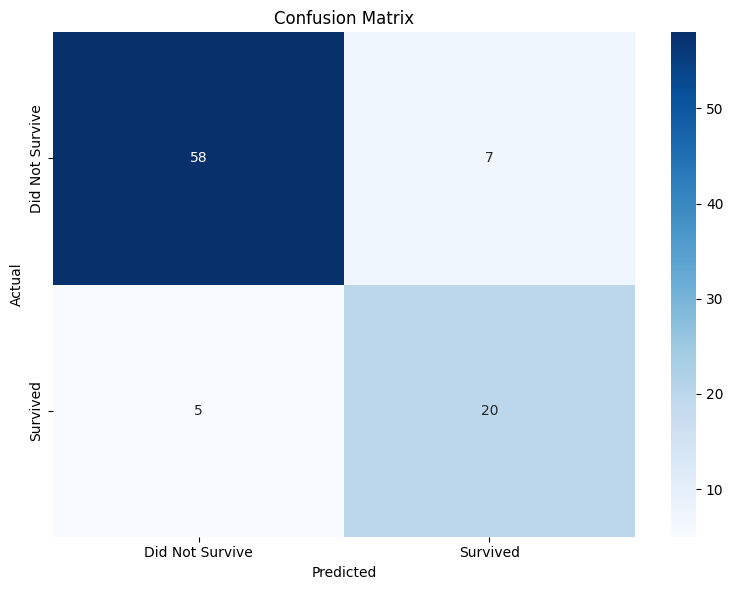


Feature Importance:
            Feature  Importance
1               Sex    0.513584
0            Pclass    0.141785
10            Title    0.094531
9              Deck    0.089035
7         relatives    0.050692
11        Age_Class    0.027741
2               Age    0.027513
3             SibSp    0.021804
5              Fare    0.017876
12  Fare_Per_Person    0.013384
4             Parch    0.002053
6          Embarked    0.000000
8         not_alone    0.000000


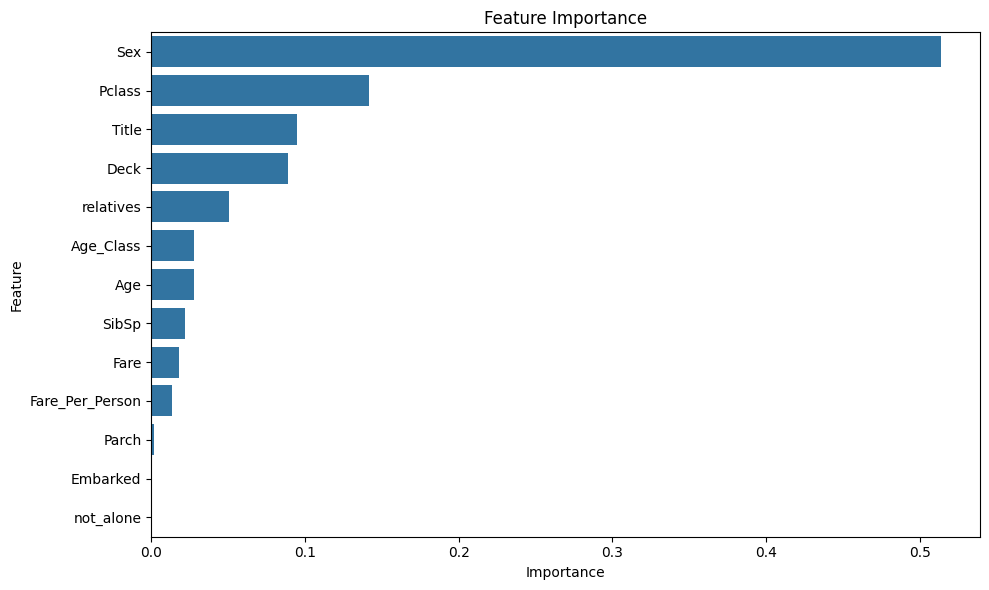

Decision Tree Accuracy: 85.67%


In [402]:
## Aplica el algoritmo de árbol de decisión al conjunto de datos de entrenamiento

MAX_DEPTH = 5  # Maximum depth of the tree to prevent overfitting
MIN_SAMPLES_SPLIT = 10  # Minimum samples required to split an internal node

# Define and train the model
decision_tree = DecisionTreeClassifier(
    random_state=RANDOM_SEED,
    max_depth=MAX_DEPTH,
    min_samples_split=MIN_SAMPLES_SPLIT
)

# Train the model while timing how long it takes
start_time = time.time()
decision_tree.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nDecision Tree training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, decision_tree.predict(X_val))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, _ = evaluate_model(
    decision_tree, 
    X_test, 
    y_test, 
    feature_names=X_train.columns.tolist()
)

# Feature importance
if hasattr(decision_tree, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': decision_tree.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # The feature importance consists of how much each feature contributes to the decision tree's predictions.
    # for example, perhaps the feature "Age" is more important than "Fare" in predicting survival.
    # This is a simple way to visualize which features are most important in the model.
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()


# add better results/data visualization of the decision tree



## Queremos evaluar la puntuación de cada modelo de predicción, también es suficiente redondear la puntuación a dos decimales
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(f"Decision Tree Accuracy: {acc_decision_tree}%")


## Descenso de gradiente estocástico


SGD Classifier training time: 0.0050 seconds
Validation accuracy: 0.7416

Test Set Evaluation:
Model prediction time: 0.0010 seconds
Accuracy: 0.8778

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.82      0.72      0.77        25

    accuracy                           0.88        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.88      0.88      0.88        90



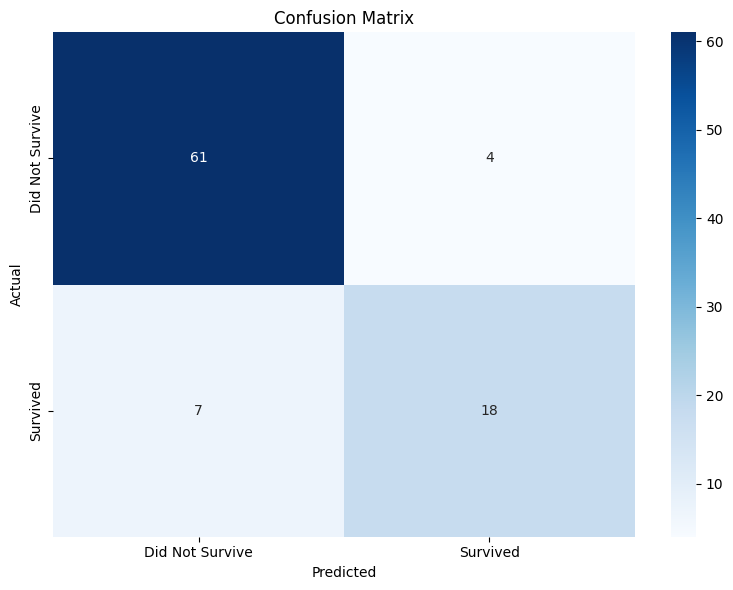

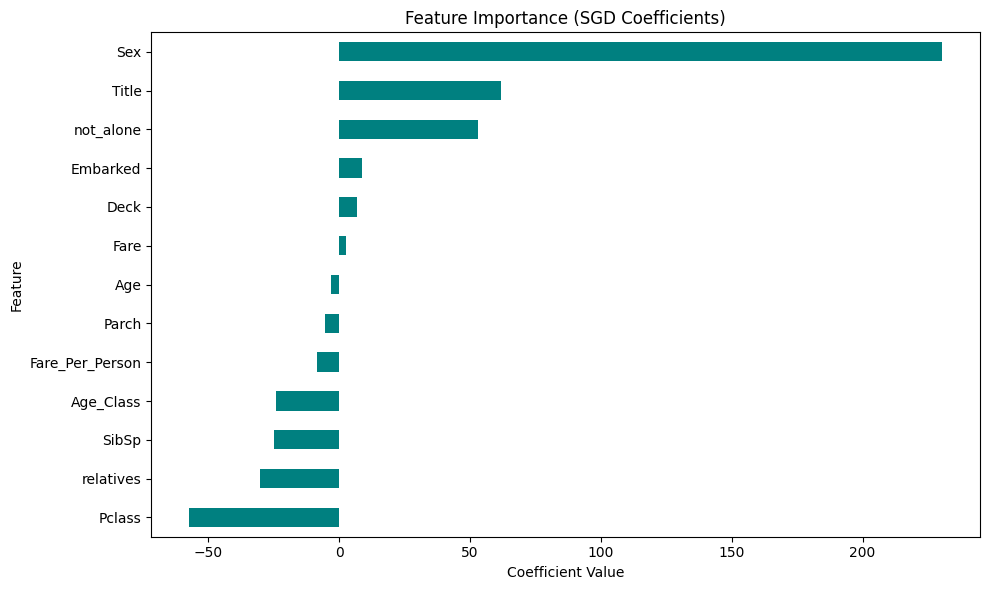

SGD Classifier Training Accuracy: 81.18%


In [401]:
## Aplica el algoritmo SGD al conjunto de datos de entrenamiento con un número máximo de iteraciones = 5 y tol = None

# Hyperparameters for SGD, must be adjusted based on the dataset
MAX_ITERATION = 5  # Number of passes over the dataset
TOL = None # Stopping criterion (imkprovement lesser than this value)
# could also add alpha value for regularization

# Define the SGD classifier
sgd_clf = SGDClassifier(
    loss='log_loss',  # Logistic Regression loss for classification
    random_state=RANDOM_SEED,
    max_iter=MAX_ITERATION,
    tol=TOL
    )

# Train the model and measure training time
start_time = time.time()
sgd_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nSGD Classifier training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, sgd_clf.predict(X_val))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, _ = evaluate_model(
    sgd_clf, 
    X_test, 
    y_test, 
    feature_names=X_train.columns.tolist()
)

## Add equivalent code for feature importance if applicable

# Final model accuracy score
test_acc_sgd = round(sgd_clf.score(X_train, y_train) * 100, 2)
print(f"SGD Classifier Training Accuracy: {test_acc_sgd}%")


## Evalúa la puntuación como para el Árbol de decisión

## Random Forest


Random Forest training time: 0.1470 seconds
Validation accuracy: 0.7640

Test Set Evaluation:
Model prediction time: 0.0050 seconds
Accuracy: 0.8556

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.77      0.68      0.72        25

    accuracy                           0.86        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.85      0.86      0.85        90



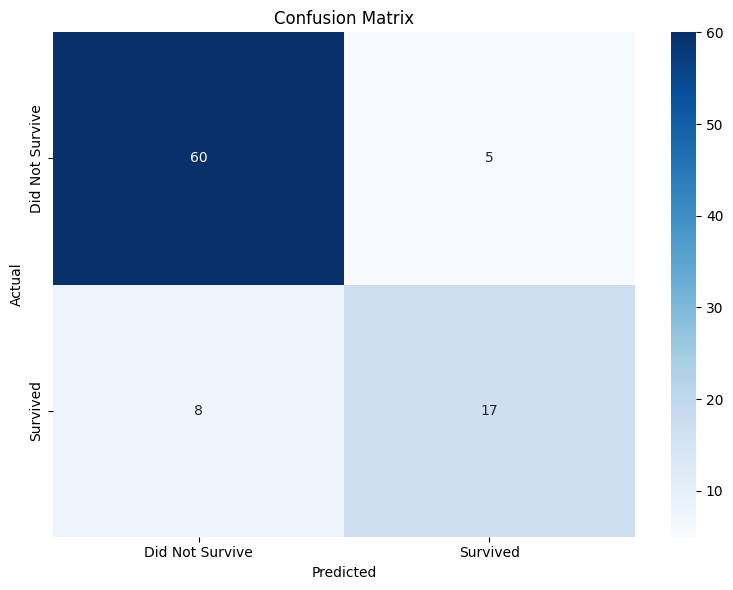


Feature Importance:
            Feature  Importance
10            Title    0.184073
1               Sex    0.163560
11        Age_Class    0.103659
2               Age    0.088963
0            Pclass    0.072091
5              Fare    0.071760
9              Deck    0.070524
12  Fare_Per_Person    0.060348
7         relatives    0.060243
6          Embarked    0.052168
3             SibSp    0.034336
4             Parch    0.026955
8         not_alone    0.011319


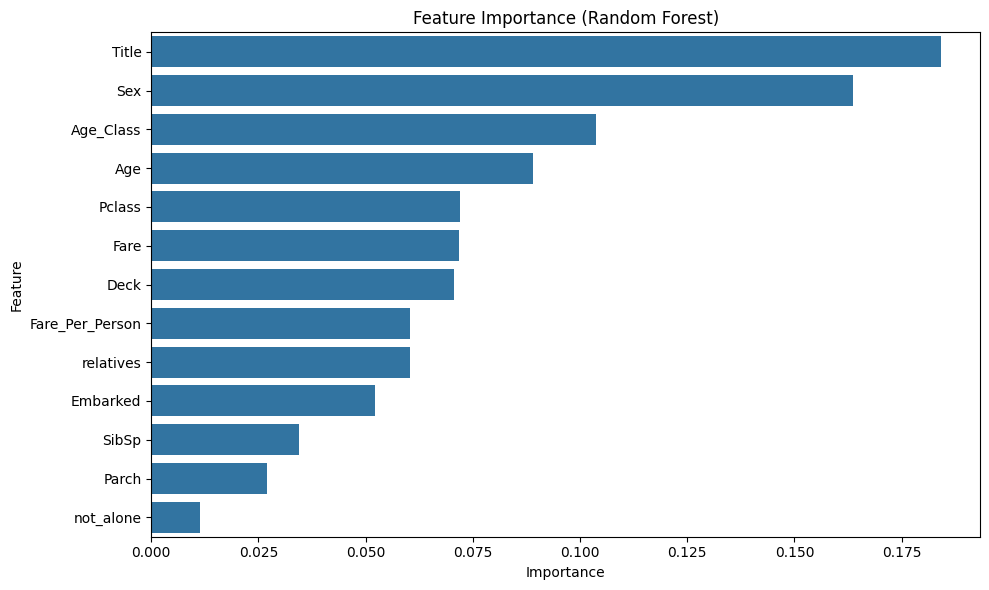

Random Forest Training Accuracy: 92.98%


In [381]:
## Aplica el algoritmo Random Forest al conjunto de datos de entrenamiento con un número máximo de estimadores = 100

# Hyperparameters for Random Forest
N_ESTIMATORS = 100  # Number of trees in the forest
MAX_DEPTH = None  # No depth limit unless specified, should not be a problemn with our current dataset
MIN_SAMPLES_SPLIT = 2  # Minimum samples required to split an internal node

# Define the Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=N_ESTIMATORS,
    max_depth=MAX_DEPTH,
    min_samples_split=MIN_SAMPLES_SPLIT,
    random_state=RANDOM_SEED
)

# Train the model and measure training time
start_time = time.time()
rf_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nRandom Forest training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, rf_clf.predict(X_val))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, _ = evaluate_model(
    rf_clf, 
    X_test, 
    y_test, 
    feature_names=X_train.columns.tolist()
)

# Feature importance analysis
if hasattr(rf_clf, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_clf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

# Final model accuracy score
test_acc_rf = round(rf_clf.score(X_train, y_train) * 100, 2)
print(f"Random Forest Training Accuracy: {test_acc_rf}%")


## Evalúa la puntuación como para el Árbol de decisión

## Regresión Logística


Logistic Regression training time: 0.0370 seconds
Validation accuracy: 0.7640

Test Set Evaluation:
Model prediction time: 0.0010 seconds
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.77      0.92      0.84        25

    accuracy                           0.90        90
   macro avg       0.87      0.91      0.88        90
weighted avg       0.91      0.90      0.90        90



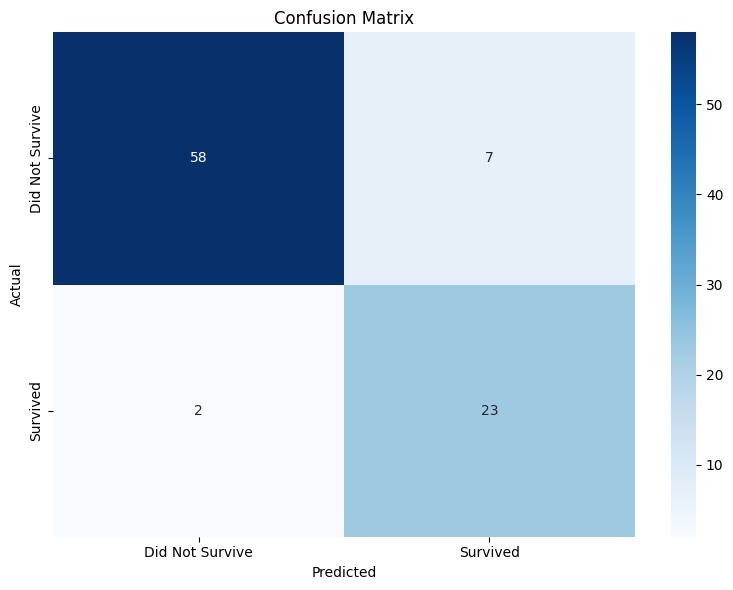


Feature Importance:
            Feature  Importance
1               Sex    2.131924
8         not_alone    0.787318
0            Pclass    0.685346
10            Title    0.413584
3             SibSp    0.283997
7         relatives    0.264614
2               Age    0.254794
9              Deck    0.138475
12  Fare_Per_Person    0.130129
6          Embarked    0.106849
11        Age_Class    0.030058
5              Fare    0.024338
4             Parch    0.019383


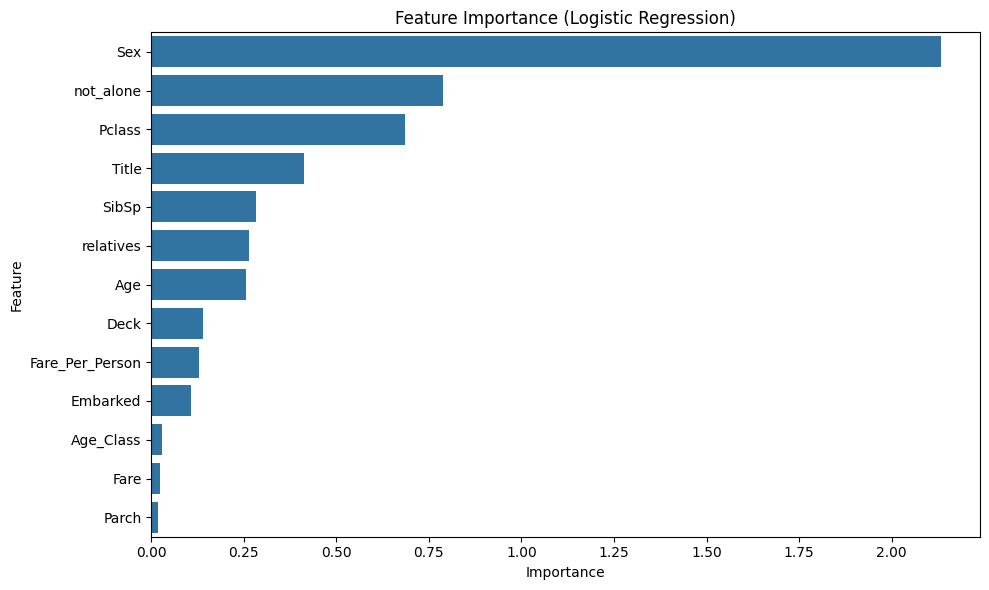

Logistic Regression Training Accuracy: 80.62%


In [377]:
## Aplica el algoritmo de Regresión Logística al conjunto de datos de entrenamiento

# Hyperparameters for Logistic Regression
MAX_ITER = 100  # Maximum number of iterations

# Define the Logistic Regression classifier
lr_clf = LogisticRegression(
    max_iter=MAX_ITER,
    random_state=RANDOM_SEED
)

# Train the model and measure training time
start_time = time.time()
lr_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nLogistic Regression training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, lr_clf.predict(X_val))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, _ = evaluate_model(
    lr_clf, 
    X_test, 
    y_test, 
    feature_names=X_train.columns.tolist()
)

# Feature importance analysis (for Logistic Regression, we use the absolute coefficients)
if hasattr(lr_clf, 'coef_'):
    # Get feature importance from the model coefficients
    importance = np.abs(lr_clf.coef_[0])
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Logistic Regression)')
    plt.tight_layout()
    plt.show()

# Final model accuracy score
test_acc_lr = round(lr_clf.score(X_train, y_train) * 100, 2)
print(f"Logistic Regression Training Accuracy: {test_acc_lr}%")

## K vecinos más cercanos

In [392]:
'''
Usefull functions to analyze the results of KNN
'''

# Visualize relationship between k value and model performance
def knn_k_optimization(X_train_scaled, y_train, X_val_scaled, y_val):
    k_range = range(1, 31)
    train_scores = []
    val_scores = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        train_scores.append(knn.score(X_train_scaled, y_train))
        val_scores.append(knn.score(X_val_scaled, y_val))
    
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, train_scores, label='Training Accuracy')
    plt.plot(k_range, val_scores, label='Validation Accuracy')
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')
    plt.title('KNN: Accuracy vs K Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Find optimal k value based on validation accuracy
    optimal_k = k_range[np.argmax(val_scores)]
    print(f"Optimal value of k based on validation accuracy: {optimal_k}")
    return optimal_k


K-Nearest Neighbors training time: 0.0020 seconds
Validation accuracy: 0.7865

Test Set Evaluation:
Model prediction time: 0.0060 seconds
Accuracy: 0.8889

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.80      0.80      0.80        25

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90



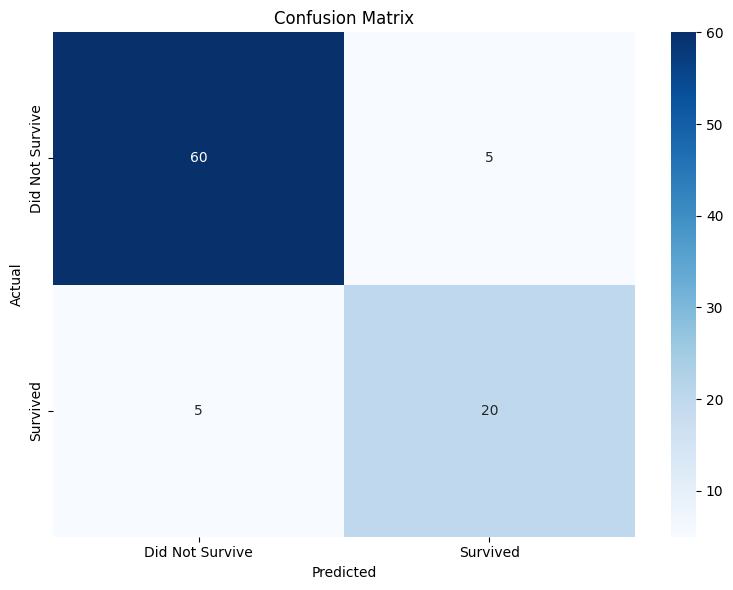

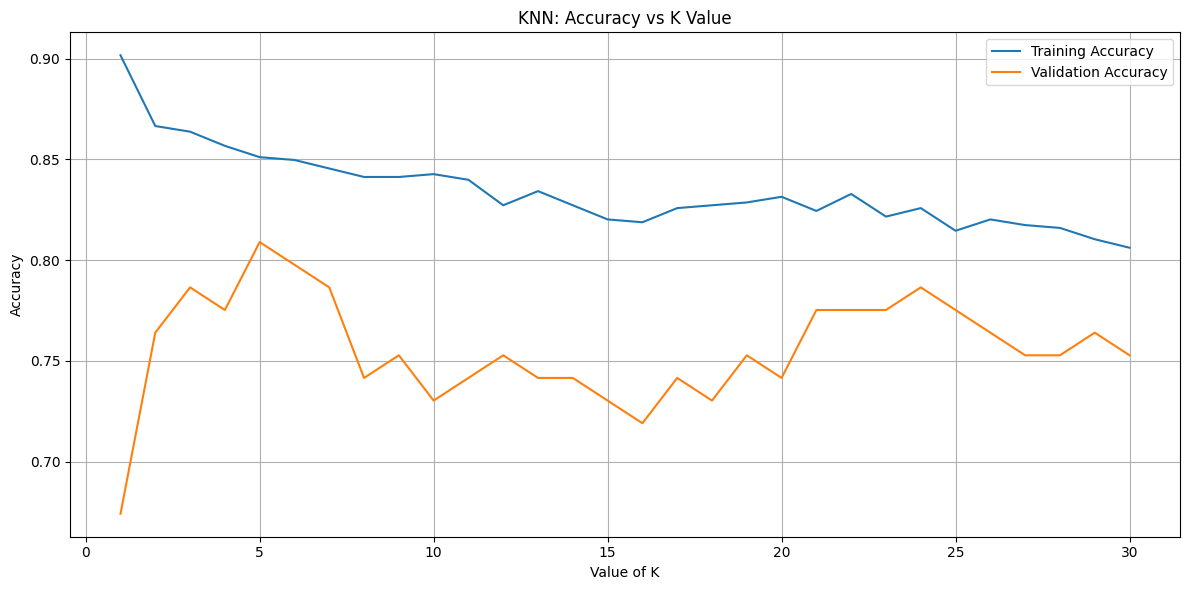

Optimal value of k based on validation accuracy: 5
KNN Training Accuracy: 86.38%


In [393]:
## Aplica el algoritmo KNN al conjunto de datos de entrenamiento con 3 vecinos

# Hyperparameters for KNN
N_NEIGHBORS = 3  # Number of neighbors to use
WEIGHTS = 'uniform'  # Weight function used in prediction

'''
Why standardize features?
KNN is a distance-based algorithm, and the distance between points is affected by the scale of the features.
If features are on different scales, the distance metric may be dominated by the feature with the largest scale (e.g., age vs. fare).
the age would be in years and fare in dollars, which would lead to a bias towards the fare feature.
Standardizing features ensures that each feature contributes equally to the distance metric.
'''

# Standardize features (important for KNN which is distance-based)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the KNN classifier
knn_clf = KNeighborsClassifier(
    n_neighbors=N_NEIGHBORS,
    weights=WEIGHTS
    )

# Train the model and measure training time
start_time = time.time()
knn_clf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"\nK-Nearest Neighbors training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, knn_clf.predict(X_val_scaled))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, y_pred = evaluate_model(
    knn_clf, 
    X_test_scaled, 
    y_test
)

features_names = X_train.columns.tolist()

knn_k_optimization(X_train_scaled, y_train, X_val_scaled, y_val)

# Final model accuracy score
test_acc_knn = round(knn_clf.score(X_train_scaled, y_train) * 100, 2)
print(f"KNN Training Accuracy: {test_acc_knn}%")
## Evalúa la puntuación como para el Árbol de decisión

Bayes ingenuo gaussiano


Gaussian Naive Bayes training time: 0.0030 seconds
Validation accuracy: 0.6854

Test Set Evaluation:
Model prediction time: 0.0020 seconds
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        65
           1       0.60      0.84      0.70        25

    accuracy                           0.80        90
   macro avg       0.76      0.81      0.77        90
weighted avg       0.84      0.80      0.81        90



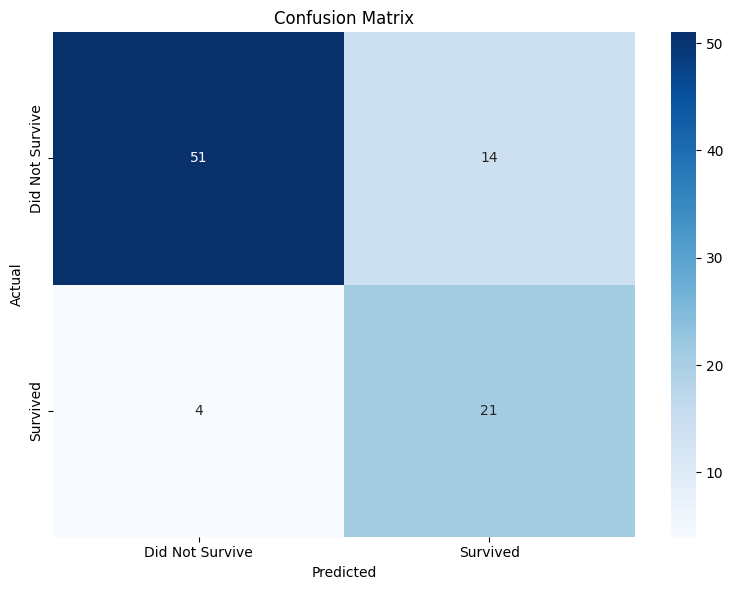

Gaussian Naive Bayes Training Accuracy: 78.65%


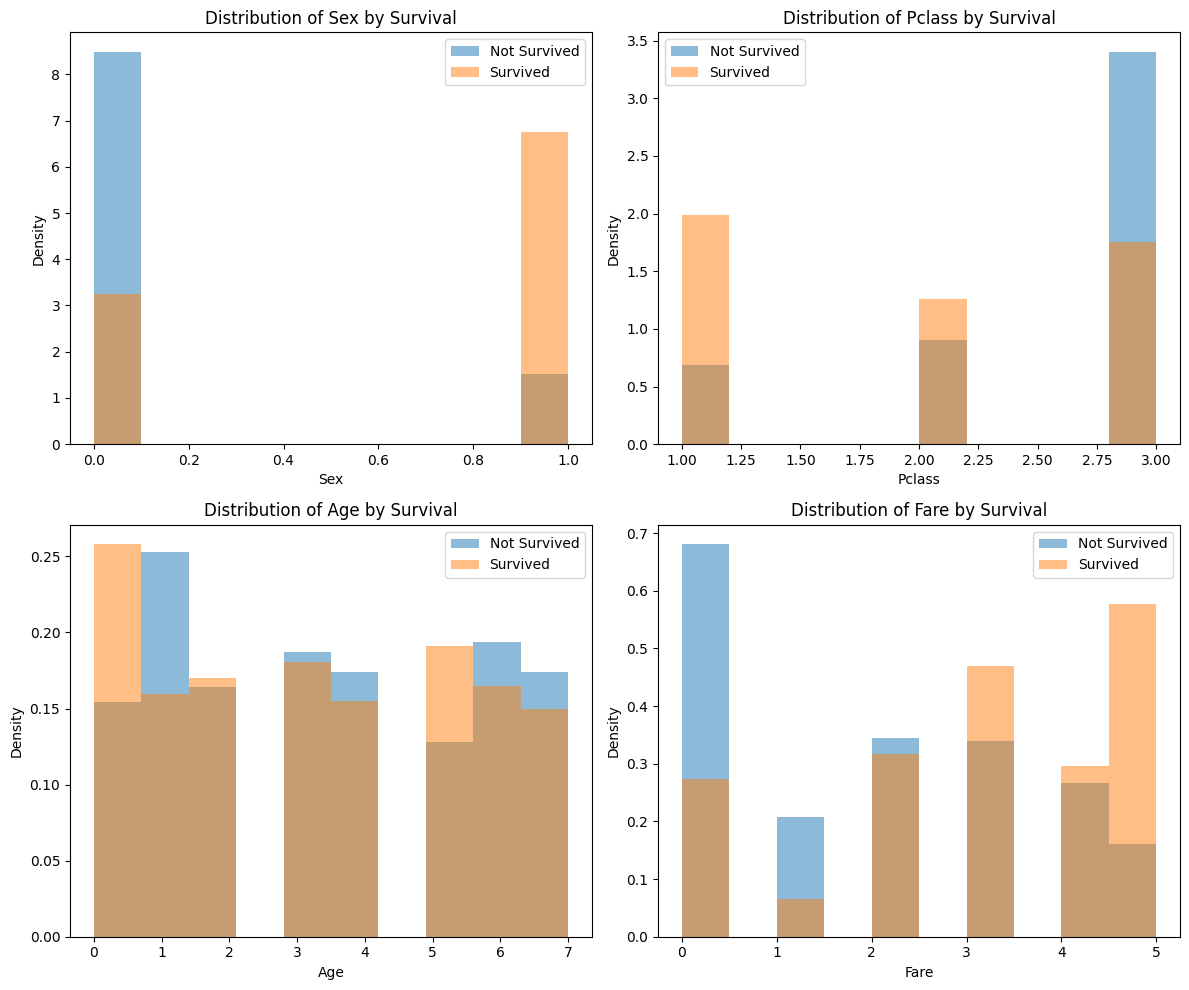

In [400]:
## Aplica el algoritmo Bayes ingenuo gaussiano al conjunto de datos de entrenamiento

# Define the Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()

# Train the model and measure training time
start_time = time.time()
gnb_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"\nGaussian Naive Bayes training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, gnb_clf.predict(X_val))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, y_pred = evaluate_model(
    gnb_clf, 
    X_test, 
    y_test, 
    feature_names=X_train.columns.tolist()
)

# Final model accuracy score
test_acc_gnb = round(gnb_clf.score(X_train, y_train) * 100, 2)
print(f"Gaussian Naive Bayes Training Accuracy: {test_acc_gnb}%")

# Visualize the class conditional probabilities for a few important features
top_features = ['Sex', 'Pclass', 'Age', 'Fare']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features[:4]):
    if i < len(axes):
        for class_idx in [0, 1]:
            class_data = X_train[y_train == class_idx][feature]
            axes[i].hist(class_data, alpha=0.5, bins=10, 
                        label=f'{"Not Survived" if class_idx==0 else "Survived"}', density=True)
        
        axes[i].set_title(f'Distribution of {feature} by Survival')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()

plt.tight_layout()
plt.show()



## Evalúa la puntuación como para el Árbol de decisión

## Perceptrón


Perceptron training time: 0.0020 seconds
Validation accuracy: 0.6966

Test Set Evaluation:
Model prediction time: 0.0010 seconds
Accuracy: 0.8222

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        65
           1       0.70      0.64      0.67        25

    accuracy                           0.82        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.82      0.82      0.82        90



c:\Users\archi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


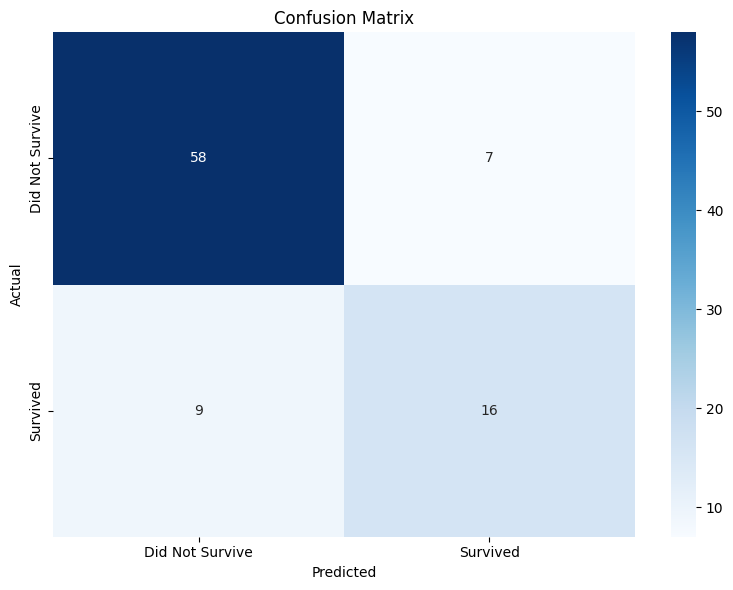


--- Perceptron Decision Boundary Visualization ---


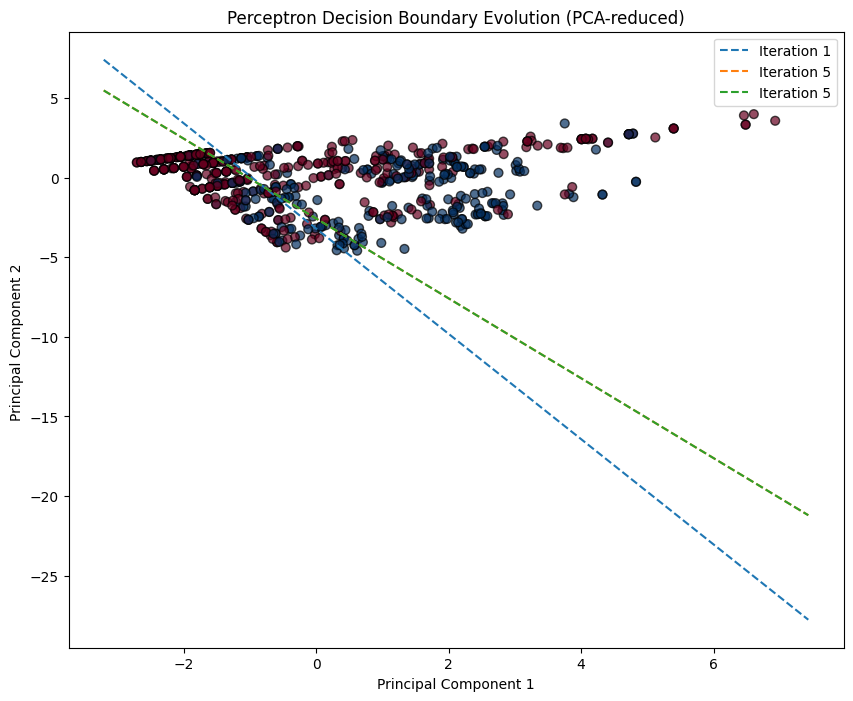

Explained variance: [0.29809558 0.23137335]
Perceptron Training Accuracy: 75.42%


In [419]:
## Aplica el algoritmo de Perceptrón al conjunto de datos de entrenamiento con 5 iteraciones

## Apply Perceptron to the training dataset

# Define the Perceptron classifier
# For more details on why i'm doign this check comments on the KNN section
# Perceptron benefits from standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters for Perceptron
MAX_ITER = 5  # Maximum number of passes over the training data

# Define the Perceptron classifier
perceptron_clf = Perceptron(
    max_iter=MAX_ITER,
    random_state=RANDOM_SEED
)

# Train the model and measure training time
start_time = time.time()
perceptron_clf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"\nPerceptron training time: {training_time:.4f} seconds")

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, perceptron_clf.predict(X_val_scaled))
print(f"Validation accuracy: {val_accuracy:.4f}")

# Evaluate model on test set
print("\nTest Set Evaluation:")
test_accuracy, y_pred = evaluate_model(
    perceptron_clf, 
    X_test_scaled, 
    y_test
)

def visualize_perceptron_decision_boundary(X_train_scaled, y_train, max_iter=50, random_seed=42):
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    perceptron = Perceptron(max_iter=1, random_state=random_seed)
    coefs_history, intercepts_history = [], []
    
    for _ in range(min(max_iter, 50)):
        perceptron.partial_fit(X_train_pca, y_train, classes=np.unique(y_train))
        coefs_history.append(perceptron.coef_[0].copy())
        intercepts_history.append(perceptron.intercept_[0])
    
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k', s=40, alpha=0.7)
    
    xx = np.linspace(X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5, 100)
    for i, idx in enumerate([0, 4, 9, 19, len(coefs_history)-1]):
        if idx < len(coefs_history):
            w, b = coefs_history[idx], intercepts_history[idx]
            if w[1] != 0:
                plt.plot(xx, -w[0] / w[1] * xx - b / w[1], '--', label=f'Iteration {idx+1}')
    
    plt.legend()
    plt.title('Perceptron Decision Boundary Evolution (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2 ')
    plt.show()
    
    print(f"Explained variance: {pca.explained_variance_ratio_}")

# Execute visualizations
print("\n--- Perceptron Decision Boundary Visualization ---")
visualize_perceptron_decision_boundary(X_train_scaled, y_train, max_iter=MAX_ITER, random_seed=RANDOM_SEED)

# print the principal components


# Final model accuracy score
test_acc_perceptron = round(perceptron_clf.score(X_train_scaled, y_train) * 100, 2)
print(f"Perceptron Training Accuracy: {test_acc_perceptron}%")

## Evalúa la puntuación como para el Árbol de decisión

## Máquina de soporte vectorial lineal

SVM Training Time: 0.0040 seconds
Validation Accuracy: 0.4607

--- Test Set Evaluation ---
Model prediction time: 0.0020 seconds
Accuracy: 0.4222

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.57        65
           1       0.11      0.16      0.13        25

    accuracy                           0.42        90
   macro avg       0.37      0.34      0.35        90
weighted avg       0.48      0.42      0.45        90



c:\Users\archi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


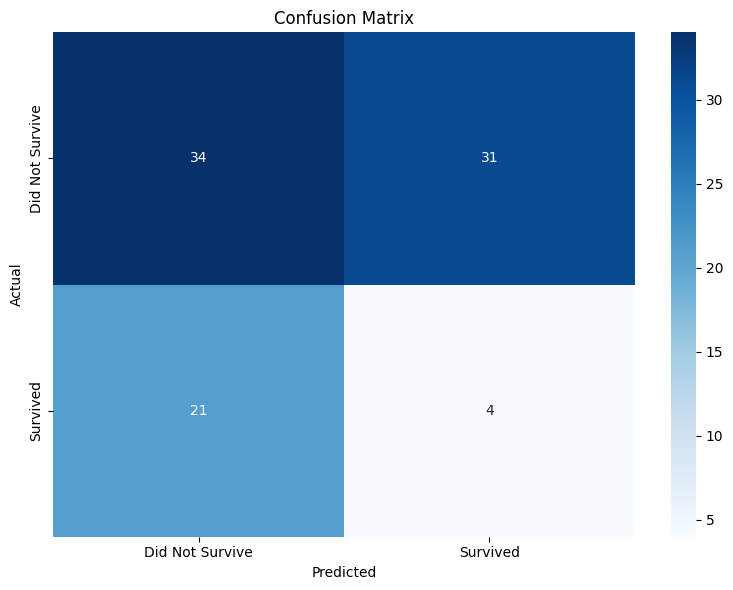

C:\Users\archi\AppData\Local\Temp\ipykernel_22304\1837584581.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette="coolwarm")



Top 10 Most Important Features:
            Feature    Importance
5              Fare  9.166667e-01
6          Embarked  5.833333e-01
1               Sex  2.500000e-01
10            Title  2.500000e-01
2               Age  4.440892e-16
12  Fare_Per_Person  1.110223e-16
0            Pclass  0.000000e+00
3             SibSp  0.000000e+00
4             Parch  0.000000e+00
7         relatives  0.000000e+00


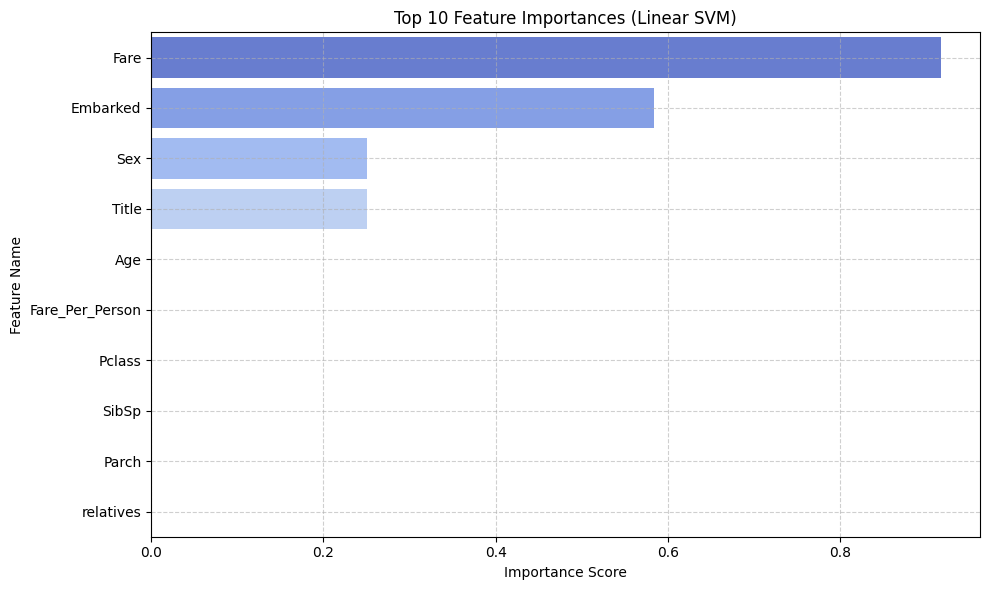

SVM Training Accuracy: 42.7%


In [443]:
## Aplica el algoritmo de Máquina de soporte vectorial lineal al conjunto de datos de entrenamiento con 5 iteraciones

MAX_ITER = 5 #60  # Maximum number of iterations, seems like 5 is way too low for SVM, 60 is a good number to start with but the model would still need better hyperparameters

# Define the SVM classifier
svm_clf = SVC(
    kernel='linear',  # Linear kernel for interpretability
    random_state=RANDOM_SEED,
    max_iter=MAX_ITER,
)

# Train the model and measure training time
start_time = time.time()
svm_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"SVM Training Time: {training_time:.4f} seconds")

# Validation accuracy
val_accuracy = accuracy_score(y_val, svm_clf.predict(X_val))
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
print("\n--- Test Set Evaluation ---")
test_accuracy, _ = evaluate_model(svm_clf, X_test, y_test, feature_names=X_train.columns.tolist())

# Feature importance analysis (for linear SVM)
if svm_clf.kernel == 'linear':
    feature_importance = np.abs(svm_clf.coef_[0])
    features_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(features_df.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette="coolwarm")
    plt.title('Top 10 Feature Importances (Linear SVM)')
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Final training accuracy
SVM_accuracy = round(svm_clf.score(X_train, y_train) * 100, 2)
print(f"SVM Training Accuracy: {SVM_accuracy}%")


## Resultados

In [ ]:
## Al final de nuestro primer ejemplo completo de Aprendizaje Automático, queremos saber qué modelo se ajusta mejor a nuestro problema.
## Por lo tanto, cambiar, si es necesario, el código de acuerdo con tus variables dadas para la puntuación

'''
3 - Decision Tree Accuracy: 85.67%
4 - SGD Classifier Training Accuracy: 81.18%
1 - Random Forest Training Accuracy: 92.98%
5 - Logistic Regression Training Accuracy: 80.62%
2 - KNN Training Accuracy: 86.38%
6 - Gaussian Naive Bayes Training Accuracy: 78.65%
7 - Perceptron Training Accuracy: 75.42%
8 - SVM Training Accuracy: 42.7%
'''

# TODO: fprmat the accuracies variables name so they follow the same patern as: algorithm_accuracy

# now we palce the above accuracies into a dataframe to visualize the results better
# as personal preference I ordered the models from the best to the worst accuracy
results = pd.DataFrame({
    'Model':['RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier',
            'SGDClassifier', 'LogisticRegression', 'GaussianNB', 'Perceptron', 'SVC'],
    'Score':[test_acc_rf, test_acc_knn, acc_decision_tree,
            test_acc_sgd, test_acc_lr, test_acc_gnb, test_acc_perceptron, SVM_accuracy]})

result_df = results.sort_values(by='Score', ascending=False) # Sort by accuracy, which is already in descending order
result_df = result_df.set_index('Score')
result_df.head(9)

#results = pd.DataFrame({
#    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
#              'Random Forest', 'Naive Bayes', 'Perceptron',
#              'Stochastic Gradient Decent',
#              'Decision Tree'],
#    'Score': [acc_linear_svc, acc_knn, acc_log,
#              acc_random_forest, acc_gaussian, acc_perceptron,
#              acc_sgd, acc_decision_tree]})
#result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
#result_df.head(9)

,Model
Score,
92.98,RandomForestClassifier
86.38,KNeighborsClassifier
85.67,DecisionTreeClassifier
81.18,SGDClassifier
80.62,LogisticRegression
78.65,GaussianNB
75.42,Perceptron
42.70,SVC
